In [1]:
__author__ = 'nate weber'
import pylab as pl
import pandas as pd
import os
import json

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mta = np.load("MTA_Fare.npy").astype(float) # -> float needed for data cleaning
#shape(dataset)

In [3]:
#cleaning data of -1 values
mta[mta==-1] = np.nan

#All Station Sum
mta_all_ride_sum = np.nansum(mta, axis=0)

#All Ride Type Sum
mta_all_station_sum = np.nansum(mta, axis=1)


# 194 Weeks Ride Totals
mta_total_rides = np.nansum(mta_all_station_sum, axis=0)


#Task 1

In [4]:
#all rides
mta_total_rides = pd.DataFrame(mta_total_rides)

In [5]:
total_thresh = [(mta_total_rides.mean() + 3*mta_total_rides.std()),
                (mta_total_rides.mean() - 3*mta_total_rides.std())]
print total_thresh, '\n'

print "we are looking for weeks with more than ~38756392 swipes or less than ~20806307 swipes"
print "maximum ridership = ", 

date = pd.date_range(start = '05/21/2010', periods = 194, freq='W')
mta_total_rides['date'] = date
sorted_swipes = mta_total_rides.sort([0, 'date'], ascending=[1, 0])
sorted_swipes.head()
#sorted_swipes.tail()

print "we are looking for weeks with more than ~38756392 swipes or less than ~20806307 swipes"
print "maximum ridership = ", max(sorted_swipes[0])
print 'minimum ridership = ', min(sorted_swipes[0])

print "no rides exceed +3 std from mean, but 1 day falls below the -3 std from mean"
print 'as seen in table below, the week of 10-21-12 had the smallest swipes of 5,218,686 swipes'
print 'thus the event detected was sandy'
print 'my week may be one week off given that sandy hit nyc on 10/29/12'
sorted_swipes.head(1)

[0    38756392.575376
dtype: float64, 0    20806307.166892
dtype: float64] 

we are looking for weeks with more than ~38756392 swipes or less than ~20806307 swipes
maximum ridership =  we are looking for weeks with more than ~38756392 swipes or less than ~20806307 swipes
maximum ridership =  34071477.0
minimum ridership =  5218686.0
no rides exceed +3 std from mean, but 1 day falls below the -3 std from mean
as seen in table below, the week of 10-21-12 had the smallest swipes of 5,218,686 swipes
thus the event detected was sandy
my week may be one week off given that sandy hit nyc on 10/29/12


0       date
126  5218686 2012-10-21

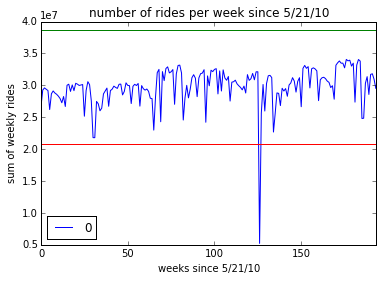

In [6]:
#plotting all rides by week

ax = mta_total_rides.plot()
#-3 std
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [total_thresh[0], total_thresh[0]])
#-3 std
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [total_thresh[1], total_thresh[1]])
pl.xlabel('weeks since 5/21/10')
pl.ylabel('sum of weekly rides')
pl.title('number of rides per week since 5/21/10')


#graph displaying sandy above

#Task 2
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

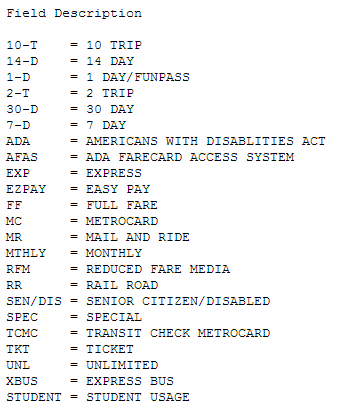

In [7]:
#showing ride types
from IPython.display import Image
Image(filename = "Ridetypes.png")

In [8]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d',
                     'ada', 'afas', 'exp', 'ez', 'ff', 'mc',
                     'mr', 'month', 'rfm', 'rr', 'sen', 'spec',
                     'tcmc', 't', 'umlim', 'xbus', 'stud'])

mta_all_ride_sum2 = mta_all_ride_sum.transpose()

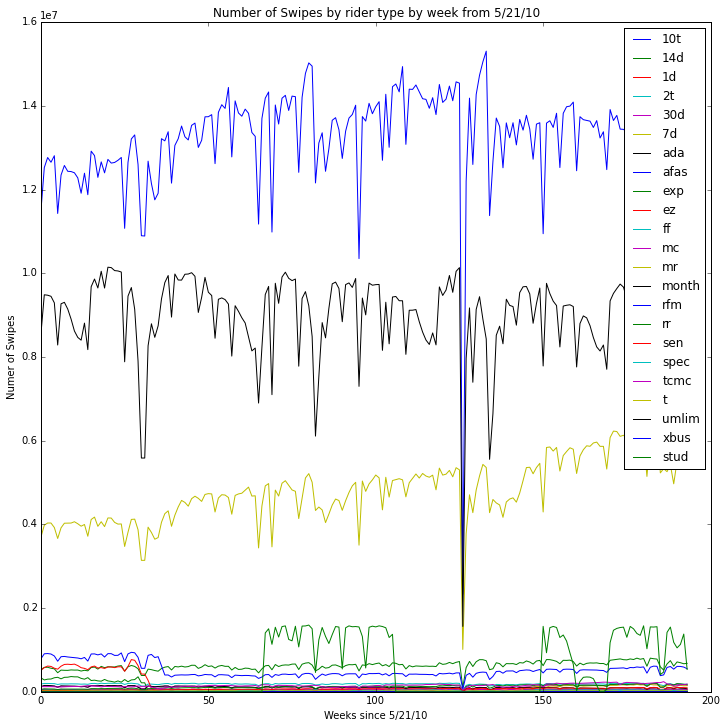

In [9]:
# Not the most intuitive plot...
fig = figure(figsize=(12,12))
pl.plot(mta_all_ride_sum2);
pl.legend(ridetype);
pl.ylabel('Numer of Swipes')
pl.xlabel('Weeks since 5/21/10')
pl.title('Number of Swipes by rider type by week from 5/21/10')


14d 1.25206505277 increased usage
1d 1.11134513987 increased usage
7d 1.38974760362 increased usage
ada 0.899841341519 decreased usage
afas 0.000209446968938 decreased usage
exp 1.06870326904e-05 decreased usage
ez 1.50195579677e-06 decreased usage
ff 0.818802130171 decreased usage
mc 1.213540557 increased usage
mr 24784.9310345 increased usage
month 0.578722384564 decreased usage
rfm 0.649608431376 decreased usage
rr 2.59295988592 increased usage
sen 2.90939676884 increased usage
spec 70.1823788546 increased usage
tcmc 1.5322710627 increased usage
umlim 0.809063881804 decreased usage
xbus 1.66232675346 increased usage
stud inf increased usage


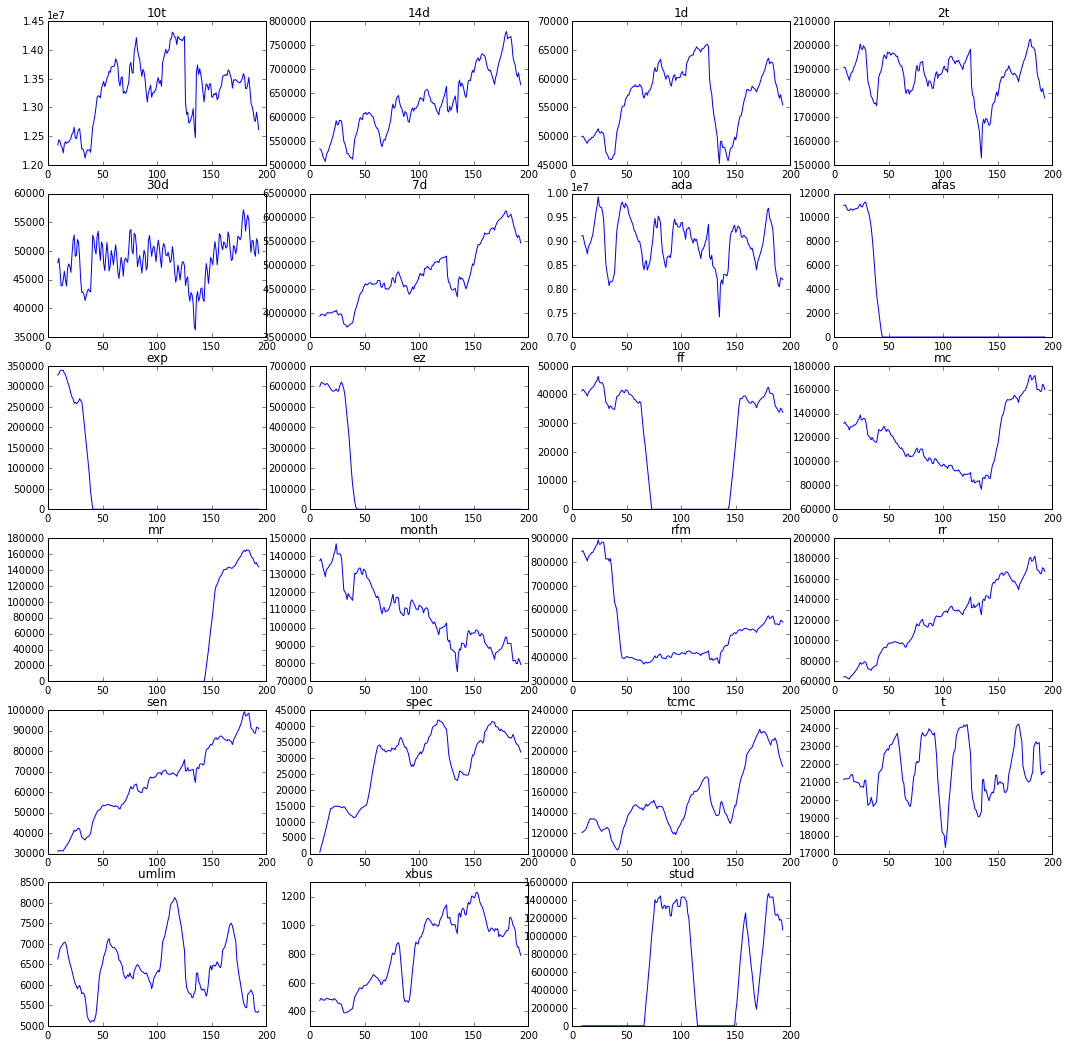

In [10]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(18,18))
ratio = np.zeros(23)
std = np.zeros(23)
for i in range(6):
    for j in range(4):
        if i*j<15:
            ax = fig.add_subplot(6,4,i*4+j+1)
            roll_mean = pd.rolling_mean(mta_all_ride_sum[i*4+j,:], 10)
            ax = pl.plot(roll_mean)
            ratio[i*4+j] = roll_mean[9]/roll_mean[193]
            std[i*4+j] = np.nanstd(roll_mean)
            pl.title(ridetype[i*4+j])
            if roll_mean[193]/roll_mean[9] < .9:
                print ridetype[i*4+j], roll_mean[193]/roll_mean[9], "decreased usage"
            if roll_mean[193]/roll_mean[9] > 1.1:
                print ridetype[i*4+j], roll_mean[193]/roll_mean[9], 'increased usage'
            
#roll_mean.shape


#Task 3:
Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)
 

In [11]:
f = np.abs(np.fft.rfft(mta_all_station_sum))
mta_all_station_sum.shape
f.shape

(600, 98)

x axis = period (weeks), y axis = power
axis were too hard to read/cramped when plotting all 600 stations


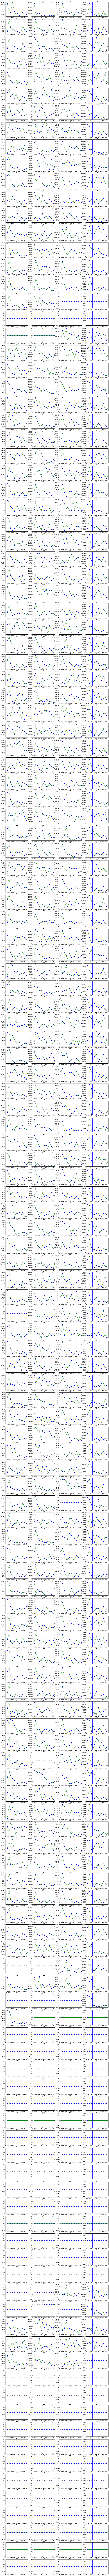

In [16]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(18,450))
ratio = np.zeros(600)

a = 0
for i in range(600):
    #for j in range(4):
    ax = fig.add_subplot(150,4,i+1)
    f = np.abs(np.fft.rfft(mta_all_station_sum[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms=8)
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/15)
    pl.title(a)
    a += 1
    ax.set_xticklabels([ "%.2f"%(1/f) for f in ax.get_xticks()], fontsize=10)
    pl.axvline(1.0/52)

print "x axis = period (weeks), y axis = power" 
print "axis were too hard to read/cramped when plotting all 600 stations"


In [17]:
#stations: 32, 150, 194, 327 have notable annual periodicity
#see plots of each below

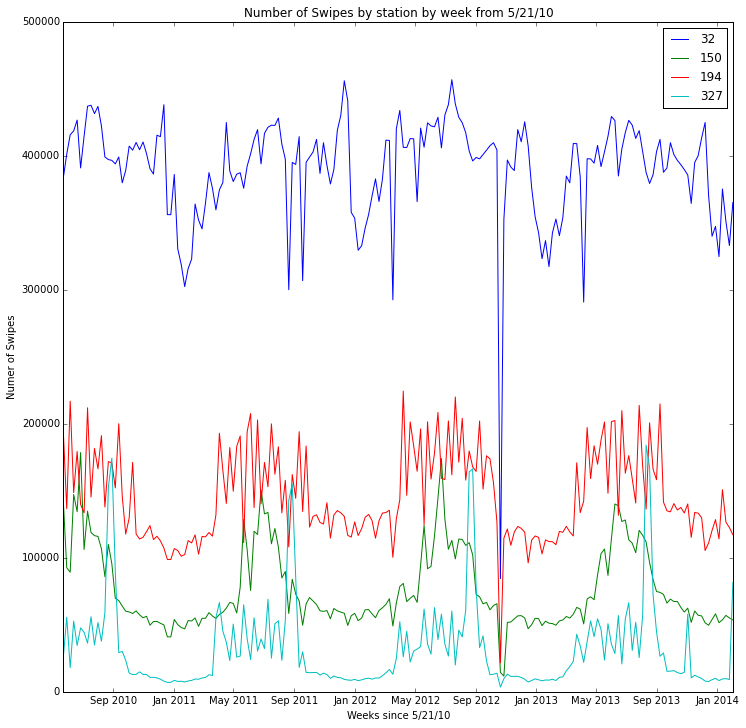

In [18]:
fig = figure(figsize=(12,12))
stations = [32, 150, 194, 327]
for i in stations:
    pl.plot(date, mta_all_station_sum[i]);
    pl.legend(stations);
    pl.ylabel('Numer of Swipes')
    pl.xlabel('Weeks since 5/21/10')
    pl.title('Number of Swipes by station by week from 5/21/10')

In [19]:
# All stations appear to have increased use in the summer.
# Perhaps these stations are located in popular destinations in the summer